# HIV Model

Anna Letcher Hartman



In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# AHHHHH


In [2]:
state = State(R=200,L=0,E=0,V=4e-7) 
init = state
init
#r= uninfected linfocites, l=latently enfected, E =activly infected, V= free vireons

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [3]:
system = System(Γ = 1.36, # rate at witch uninfected linfosytes arise
                μ = 0.00136, # natural Death of uninfected linphosyts
                τ = 0.2, # proportion of cells activated
                β = 0.00027, # rate of infaction per virion
                ρ = 0.1, # proportion of cells becoming latently infected apon infection
                α = 0.036, # activation rate of latently infected cells
                σ = 2, # removal rate of cell fre virus
                δ = 0.33,# death rate of activly infected cells
                π = 100, # rate of production of virions by active cell
                t0 = 0,
                t_end = 100,
                dt = 0.25
               )


,values
Γ,1.36000
μ,0.00136
τ,0.20000
β,0.00027
ρ,0.10000
α,0.03600
σ,2.00000
δ,0.33000
π,100.00000
t0,0.00000


In [4]:
def update(state,t, system):

    r, l, e, v = state

    unpack(system)

    #functions from paper
    drdt = (Γ*τ) - (μ*r) - (β*r*v)

    dldt = (ρ*β*r*v) - (μ*l) - (α*l)

    dedt = (1-ρ) * (β*r*v) + (α*l) - (δ*e)

    dvdt = (π*e) - (σ*v)

    r += drdt*dt

    l += dldt*dt

    e += dedt*dt

    v += dvdt*dt

   

    return State(R=r, L=l, E=e, V=v)

In [5]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        #print(t+dt)
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [6]:
#t=1
update(state,0, system)


,values
R,2.000000e+02
L,5.400000e-10
E,4.860000e-09
V,2.000000e-07


                 R             L             E             V
0.00    200.000000  0.000000e+00  0.000000e+00  4.000000e-07
0.25    200.000000  5.400000e-10  4.860000e-09  2.000000e-07
0.50    200.000000  8.049564e-10  6.893910e-09  2.215000e-07
0.75    200.000000  1.096463e-09  9.023632e-09  2.830977e-07
1.00    200.000000  1.468404e-09  1.172869e-08  3.671397e-07
1.25    200.000000  1.950328e-09  1.523503e-08  4.767870e-07
1.50    200.000000  2.575774e-09  1.978866e-08  6.192694e-07
1.75    200.000000  3.387730e-09  2.570340e-08  8.043512e-07
2.00    200.000000  4.441963e-09  3.338623e-08  1.044761e-06
2.25    200.000000  5.810902e-09  4.336568e-08  1.357036e-06
2.50    200.000000  7.588626e-09  5.632830e-08  1.762660e-06
2.75    200.000000  9.897340e-09  7.316583e-08  2.289537e-06
3.00    200.000000  1.289577e-08  9.503660e-08  2.973914e-06
3.25    200.000000  1.679011e-08  1.234452e-07  3.862872e-06
3.50    200.000000  2.184817e-08  1.603460e-07  5.017566e-06
3.75    200.000000  2.84

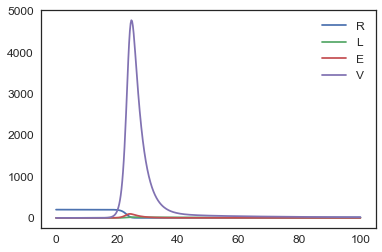

In [7]:
results = run_simulation(system, update)
print(results)
results.plot()